# TITANIC KAGGLE COMPETITION

#### S Sexton
#### May 5, 2020

## Table of Contents

* [1. Project Goal](#project_goal)
* [2. Background Information](#background_info)
* [3. Acquire Data](#acquire)
* [4. Load Libraries](#libraries)
* [5. Set Working Directory](#directory)
* [6. Load Dataset](#dataset)
* [7. Cursory Explanation](#cursory)
* [8. Determine if Duplicates](#duplicate)
* [9. Explore Each Variable](#explore)
    * [9.1 Name Column](#name)
    * [9.2 Sex Column](#sex)
    * [9.3 Pclass Column](#pclass)
    * [9.4 Embarked Column](#embarked)
    * [9.5 Cabin Column](#cabin)
    * [9.6 Ticket Column](#ticket)
    * [9.7 Fare Column](#fare)
    * [9.8 Parch Column](#parch)
    * [9.9 SibSp Column](#sibsp)
    * [9.10 Age Column](#age)
* [10. Modeling](#modeling)


# 1. Project Goal <a class="anchor" id="project_goal"></a>
Kaggle has already predefined the project goal as:
- Given a training set which lists passengers who survived or did not survive the Titanic disaster, create a model to determine who survived in the test dataset.

# 2. Background Information <a class="anchor" id="background_info"></a>
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. This may be likely to the prevailing thoughts at the time to save women and children first.

# 3. Acquire Data <a class="anchor" id="acquire"></a>

- This is not necessary since it is supplied by the kaggle competition.

# 4. Load Libraries <a class="anchor" id="libraries">

In [1]:
# have to install any python packages that are missing but all necessary packages are installed

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 5. Set Working Directory <a class="anchor" id="directory"></a>

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\sexto\\titaniccontest')
os.getcwd()

'C:\\Users\\sexto\\titaniccontest'

# 6. Load Dataset <a class="anchor" id="dataset"></a>

In [3]:
# Make code as reproducible as possible which includes where data was downloaded from.
# reading in data with the web link set to a variable is causing problems 

# Instead, manually downloaded titanic data from kaggle website into working directory
# Data downloaded from: https://www.kaggle.com/c/titanic/data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 7. Cursory Exploration <a class="anchor" id="cursory"></a>

Examine the size, contents, types of variables, missing variables, etc.

In [4]:
# training dataframe
# size 
sizeTrain = train_df.size
sizeTest = test_df.size
  
# shape 
shapeTrain = train_df.shape 
shapeTest = test_df.shape

# printing size and shape 
print("SizeTrain = {}\nShapeTrain = {}".
format(sizeTrain, shapeTrain))
print("SizeTest = {}\nShapeTest = {}".
format(sizeTest, shapeTest))

SizeTrain = 10692
ShapeTrain = (891, 12)
SizeTest = 4598
ShapeTest = (418, 11)


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### Preliminary observations

#### From size
- train_df has the extra column "Survived"

#### From info
- INTEGERS: PassengerId, Survived, PClass, SibSp, Parch
- OBJECT: Name, Sex, Ticket, Cabin, Embarked
- FLOAT: Age, Fare

#### From describe
- min age is 0.42 which seems small but could indicate a baby
- max age is 80 which seems about right
- extremely high far of 512 which could indicate more than one person on the ticket
- ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

2. Age is missing 891-714 = 177 variables.
3. Cabin seems to have a lot of nan values.

#### Variable Type
- Look at the given description of the column names (OR search the web to determine what the variable means) to determine if the type of variable is appropriate or should be changed.
- Type of variables are: integer, factor, object, float64
    
- Survived is either 0 or 1 so should set as category
- Pclass is either 1 or 2 or 3 so should set as category
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names
- Ticket is a mix of numeric and alphanumeric data types
- Cabin is alphanumeric    

# 8. Determine if Duplicates <a class="anchor" id="duplicate"></a>
- Combine entire dataset to determine if duplicates that need to be removed.
- Choose a variable that is unique.

##### Determine if there are duplicates in entire dataset
Best variable to use to determine this is name since it is very unique.

In [21]:
# Combine train and test dataset by adding Survived column to test dataset and with NaN
# Combine them so can clean data and feature engineer
combined_df =  pd.concat(objs=[train_df, test_df], axis=0, sort=False).reset_index(drop=True)
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
# Select all duplicate rows based on one column
# List first and all instance of duplicate names
duplicateRowsName1 = combined_df[combined_df.duplicated(['Name'], keep='last')]
duplicateRowsName2 = combined_df[combined_df.duplicated(['Name'])]
duplicateRowsName3 = pd.concat([duplicateRowsName1, duplicateRowsName2])
sortName = duplicateRowsName3.sort_values(by=['Name'])
sortName

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Upon examining the duplicate names, it appears that both are actually unique people since they have different ages and ticket numbers. These duplicate names will NOT be removed.

# 9. Explore each variable <a class="anchor" id="explore"></a>

### Explore each column by:

##### First, clean up the variable, look at:
1. Are there missing values? Fill in with proxy, etc.
2. Is there an adequate number of that variable to properly represent the sample?
3. Are there outliers that should be dropped or addressed?
4. Are there inappropriate values for that variable?
5. Is the data type appropriate?
6. Can the variable be feature engineered?

##### Second, visualize the variable with charts and tables.

### 9.1 Name Column <a class="anchor" id="name"></a>

Now look at the varible title in the train dataset

In [18]:
# Are there any null values?
# Are there any null values?
all = len(train_df["Name"])
print ("Total variables for Name are:", all)
null_Name = train_df["Name"].isnull().sum()
print("Missing values for Name are:", null_Name)

Total variables for Name are: 891
Missing values for Name are: 0


In [19]:
a = min(train_df["Name"]), max(train_df["Name"])
print('Min and Max values are:', a)

b= train_df.Name.unique()
print('Unique values are:', b)

c = train_df.Name.dtype
print('Data type is:', c)

Min and Max values are: ('Abbing, Mr. Anthony', 'van Melkebeke, Mr. Philemon')
Unique values are: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'E

##### Extract title from the Name column

In [29]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title"] = pd.Series(dataset_title)
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

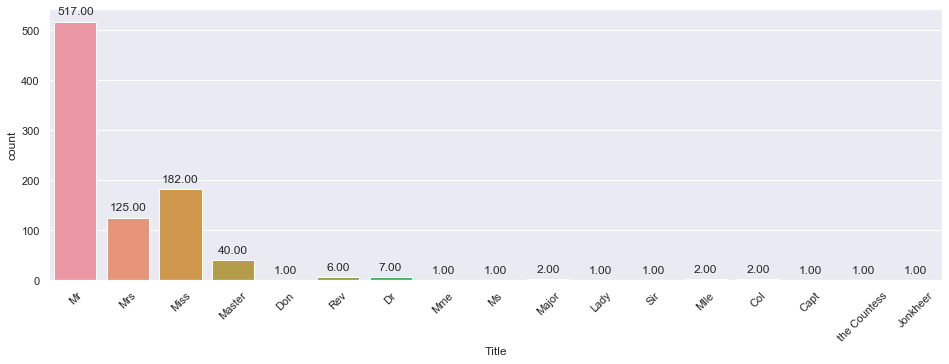

In [28]:
# Count how many of each title there are
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(x="Title",data=train_df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = plt.setp(g.get_xticklabels(), rotation=45)

In [29]:
# Convert to categorical values Title 
train_df["Title"] = train_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df["Title"] = train_df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3, "Rare":4})
train_df["Title"] = train_df["Title"].astype(int)

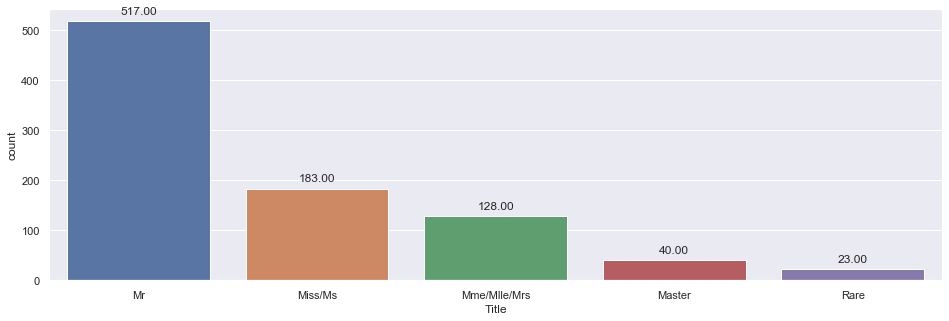

In [30]:
ax = sns.countplot(train_df["Title"], 
                   order = train_df["Title"].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax = ax.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master","Rare"])

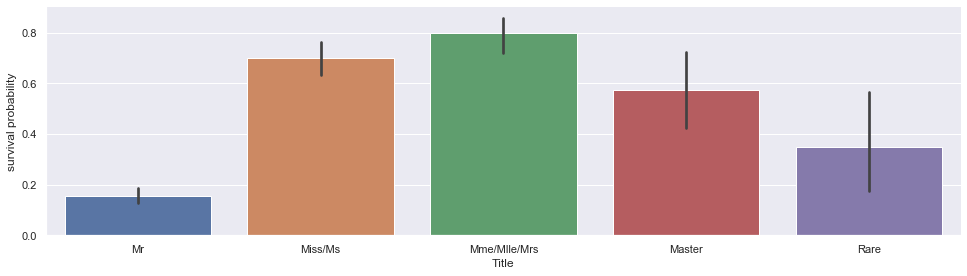

In [31]:
x = sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar", height=4, aspect=3.4, order = train_df["Title"].value_counts().index)
x = x.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master","Rare"])
x = x.set_ylabels("survival probability")

Note: The Rare group consists of only 23 samples AND it consists of mixed age ranges and sex. Thus, it would be best to group the Rare values into 1 of the 4 main categories.

##### Survival probability by title with the Rare category being grouped into one of the 4 main categories.

Upon researching what each title means, group the following.

Group the following into Mr - 
- Don - Don, and dom, is derived from the Latin Dominus: a master of a household who were male
- Rev - Reverend is an honorific style most often placed before the names of Christian clergy and ministers who were male
- Dr - Contracted "Dr" or "Dr.", it is used as a designation for a person who has obtained a doctorate who were typically male in the early 20th century
- Major - An army officer of high rank, in particular (in the US Army, Air Force, and Marine Corps) an officer ranking above captain and below lieutenant colonel. They were typically male in the early 20th century.
- Sir - A formal English honorific address for men.
- Col - Colonel (abbreviated Col., Col or COL and alternatively spelled coronel) is a senior military officer rank below the general officer ranks. They were typically male in the early 20th century.
- Capt - Captain is a military rank in armies, navies, coast guards, etc. They were typically male in the early 20th century.
- Jonkheer - an honorific in the Low Countries denoting the lowest rank within the nobility. Unsure if male or female typically.

Group the following into Mrs -
- Lady - a woman of superior social position, especially one of noble birth
- Countess/ the Countess - the wife or widow of a count or earl

In [32]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title2"] = pd.Series(dataset_title)

In [33]:
mr_df = train_df[train_df['Title2'].isin(['Don','Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'])]
sortName2 = mr_df.sort_values(by=['Title2'])
sortName2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,S,4,Capt
694,695,0,1,"Weir, Col. John",0,60.0,0,0,113800,26.5500,NaN,S,4,Col
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",0,56.0,0,0,13213,35.5000,A26,C,4,Col
30,31,0,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,NaN,C,4,Don
796,797,1,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,D17,S,4,Dr
245,246,0,1,"Minahan, Dr. William Edward",0,44.0,2,0,19928,90.0000,C78,Q,4,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",0,NaN,0,0,112379,39.6000,NaN,C,4,Dr
317,318,0,2,"Moraweck, Dr. Ernest",0,54.0,0,0,29011,14.0000,NaN,S,4,Dr
398,399,0,2,"Pain, Dr. Alfred",0,23.0,0,0,244278,10.5000,NaN,S,4,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,13214,30.5000,B50,C,4,Dr


Upon examining the ages and sex for the titles grouped in the Mr category, there is only 1 anamoly and that is the female doctor. Thus, because the sample (albeit small) supported the definitions found, I will keep those titles grouped into the Mr category.

In [34]:
mrs_df = train_df[train_df['Title2'].isin(['Lady', 'the Countess'])]
sortName2 = mrs_df.sort_values(by=['Title2'])
sortName2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,48.0,1,0,11755,39.6,A16,C,4,Lady
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5,B77,S,4,the Countess


Upon examining the ages and sex for the titles grouped in the Mrs category, the sample (albeit small) supported the definitions found, I will keep those titles grouped into the Mrs category.

In [35]:
# Convert to categorical values Title 
train_df["Title2"] = train_df["Title2"].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
train_df["Title2"] = train_df["Title2"].replace(['Lady', 'the Countess','Countess'], 'Mrs')
train_df["Title2"] = train_df["Title2"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3, "Rare":4})
train_df["Title2"] = train_df["Title2"].astype(int)

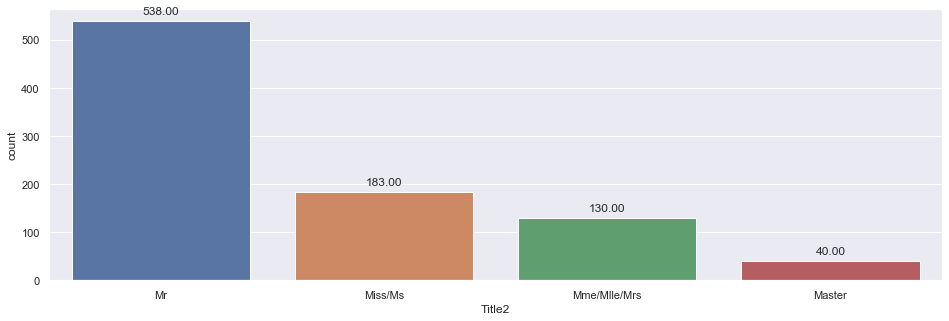

In [36]:
ax = sns.countplot(train_df["Title2"], 
                   order = train_df["Title2"].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax = ax.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master"])

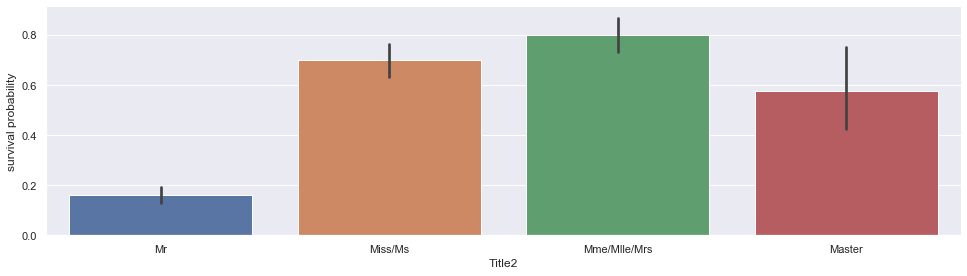

In [38]:
g = sns.factorplot(x="Title2",y="Survived",data=train_df,kind="bar", order = train_df["Title2"].value_counts().index, height=4, aspect=3.4)
g = g.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master"])
g = g.set_ylabels("survival probability")

##### Observations
- Significantly more Miss/Ms survived than Mr. More Master survived than Mr.
- Title is possibly a good variable for modeling

### 9.2 Sex Column <a class="anchor" id="sex"></a>
- Typically, the protocol aboard ships was to save women and children first. Does this seem to hold true?

In [10]:
# Are there any missing values for Survived and Sex columns?
# Are there any null values?
all = len(train_df["Sex"])
print ("Total variables for Sex are:", all)
null_Survived = train_df["Survived"].isnull().sum()
print("Missing values for Survived are:", null_Survived)
null_Sex = train_df["Sex"].isnull().sum()
print("Missing values for Sex are:", null_Sex)

Total variables for Sex are: 891
Missing values for Survived are: 0
Missing values for Sex are: 0


In [11]:
print("Ensure there are an adequate number of males and females who survived & didn't survive.")
# PassengerId was used because it has no missing values 
sextest1 = train_df[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived'], as_index=False).count()
print(sextest1)
print('The lowest number is 81 which is adequate for comparison.')

Ensure there are an adequate number of males and females who survived & didn't survive.
      Sex  Survived  PassengerId
0  female         0           81
1  female         1          233
2    male         0          468
3    male         1          109
The lowest number is 81 which is adequate for comparison.


In [12]:
a = min(train_df["Sex"]), max(train_df["Sex"])
print('Min and Max values are:', a)

b= train_df.Sex.unique()
print('Unique values are:', b)

c = train_df.Sex.dtype
print('Data type is:', c)

Min and Max values are: ('female', 'male')
Unique values are: ['male' 'female']
Data type is: object


- Sex does not have any outliers.
- Sex does not have any inappropriates values. The column is made up of either male or female.
- Sex is an object data type which is appropriate.

Probability for Survival for males and females:
      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0, 0.5, 'survival probabilty')

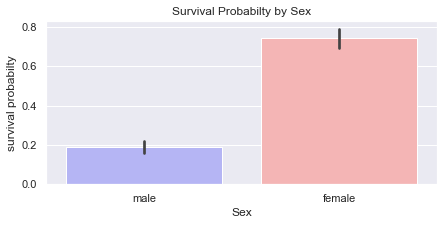

In [13]:
print('Probability for Survival for males and females:')
sextest = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sextest)

sns.set(rc={'figure.figsize':(7,3)})
g = sns.barplot(x="Sex",y="Survived",data=train_df, palette="bwr").set_title("Survival Probabilty by Sex")
plt.ylabel("survival probabilty")

##### Observation
- Significantly more females than males survived
- Sex seems like an important variable for modeling

### 9.3 Pclass Column <a class="anchor" id="pclass"></a>
- Pclass is ticket class and typically rich people will buy a higher class ticket than poor people
- Pclass 1 the is highest & most expensive class with Pclass 3 being the lowest & cheapest class

In [14]:
# Are there any null values?
all = len(train_df["Pclass"])
print ("Total variables for Pclass are:", all)

null_Pclass = train_df["Pclass"].isnull().sum()
print("Missing values for Pclass are:", null_Pclass)

Total variables for Pclass are: 891
Missing values for Pclass are: 0


In [15]:
print("Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.")
# PassengerId was used because it has no missing values 
Pclasstest2 = train_df[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived'], as_index=False).count()
print(Pclasstest2)
print('The lowest number is 80 which is adequate for comparison.')

Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.
   Pclass  Survived  PassengerId
0       1         0           80
1       1         1          136
2       2         0           97
3       2         1           87
4       3         0          372
5       3         1          119
The lowest number is 80 which is adequate for comparison.


In [16]:
a = min(train_df["Pclass"]), max(train_df["Pclass"])
print('Min and Max values are:', a)

b= train_df.Pclass.unique()
print('Unique values are:', b)

c = train_df.Pclass.dtype
print('Data type is:', c)

Min and Max values are: (1, 3)
Unique values are: [3 1 2]
Data type is: int64


- Pclass does not have any outliers.
- Pclass does not have any inappropriates values. The column is made up of either 1,2,3 Pclass.
- Pclass is an int64 data type which is appropriate.

Probability for Survival in each class (with 1 being 1st class) is as follows:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


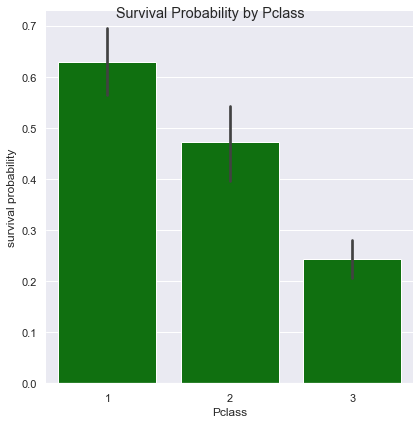

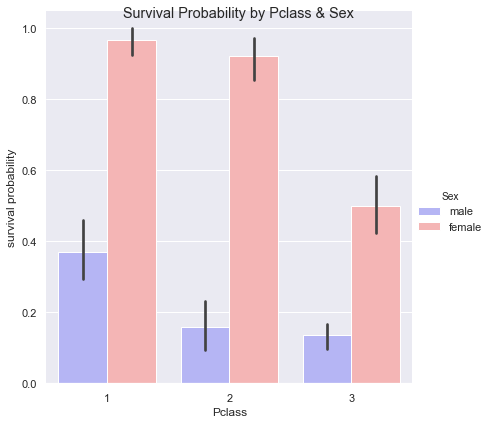

In [17]:
print('Probability for Survival in each class (with 1 being 1st class) is as follows:')
Pclasstest = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(Pclasstest)

# Explore Pclass vs Survived
g = sns.catplot(x="Pclass",y="Survived",data=train_df,kind="bar", height = 6 , 
color = "green")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass")

# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                   height=6, kind="bar", palette="bwr")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass & Sex")

##### Observation
- 1st class survival rate is better than 2nd class and 2nd class is better than 3rd class
- Females overall have a much better chance of surviving
- 1st class males and females have a better chance of surviving than lower class
- Pclass seems to be a good variable for modeling

### 9.4 Embarked Column <a class="anchor" id="embarked"></a>

In [39]:
# Are there any null values?
all = len(train_df["Embarked"])
print ("Total variables for Embarked are:", all)
null_Embarked = train_df["Embarked"].isnull().sum()
print("Missing values for Embarked are:", null_Embarked)

Total variables for Embarked are: 891
Missing values for Embarked are: 2


In [40]:
#a = min(train_df["Embarked"]), max(train_df["Embarked"])
#print('Min and Max values are:', a)

b= train_df.Embarked.unique()
print('Unique values are:', b)

c = train_df.Embarked.dtype
print('Data type is:', c)

Unique values are: ['S' 'C' 'Q' nan]
Data type is: object


In [41]:
train_df[['Embarked', 'PassengerId']].groupby(['Embarked'], as_index=False).count()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


In [42]:
# Fill Embarked nan values with 'S' most frequent value since only 2 values or 0.2%
train_df["Embarked"] = train_df["Embarked"].fillna("S")

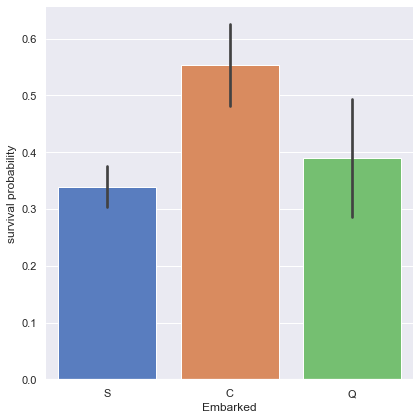

In [43]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [44]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,3,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3,3


##### Observations
- Passengers coming from Cherbourg (C) have more chance to survive.
- Perhaps the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

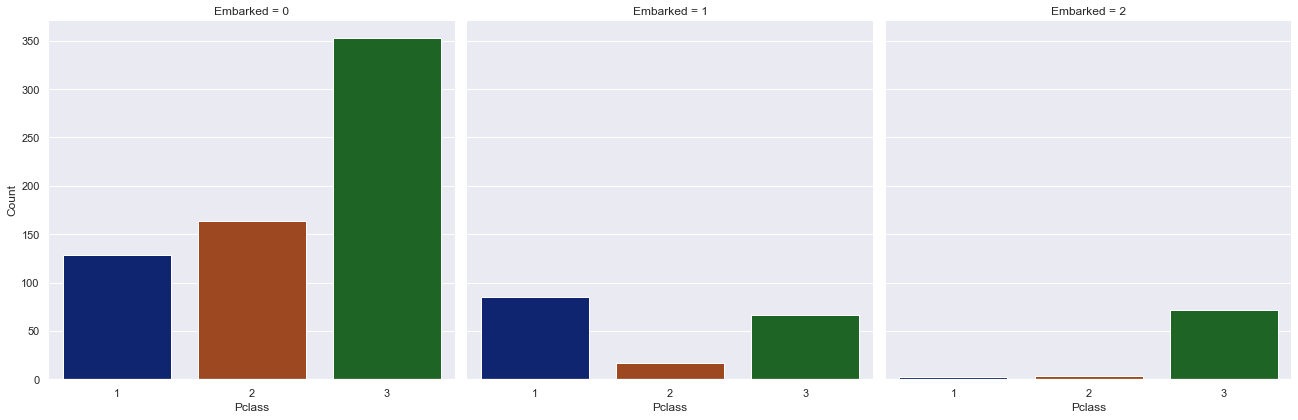

In [45]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=train_df,
                   size=6, kind="count", palette="dark")
g.despine(left=True)
g = g.set_ylabels("Count")

Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.

### 9.5 Cabin Column <a class="anchor" id="cabin"></a>

In [46]:
# Are there any null values?
all = len(train_df["Cabin"])
print ("Total variables for Cabin are:", all)
null_Embarked = train_df["Cabin"].isnull().sum()
print("Missing values for Cabin are:", null_Embarked)

Total variables for Cabin are: 891
Missing values for Cabin are: 687


In [47]:
#a = min(train_df["Cabin"]), max(train_df["Cabin"])
#print('Min and Max values are:', a)

b= train_df.Cabin.unique()
print('Unique values are:', b)

c = train_df.Cabin.dtype
print('Data type is:', c)

Unique values are: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Data type is: object


- There are 77% of Cabin values missing. Thus I will not fill it in with a proxy and will only analyze given variables.
- The first letter of the cabin indicates the deck which indicates the probable location of the passenger in the Titanic.

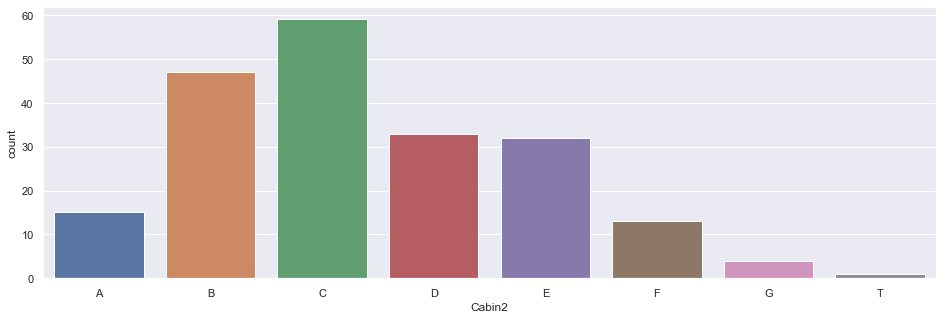

In [48]:
# Replace the Cabin number by the type of cabin 'X' if not (in case decide to use X later)
train_df["Cabin2"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Cabin'] ])
# Delete rows with value of X
cab = train_df[train_df.Cabin2 != 'X']
# chart cabin letter
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(cab["Cabin2"],order=['A','B','C','D','E','F','G','T'])

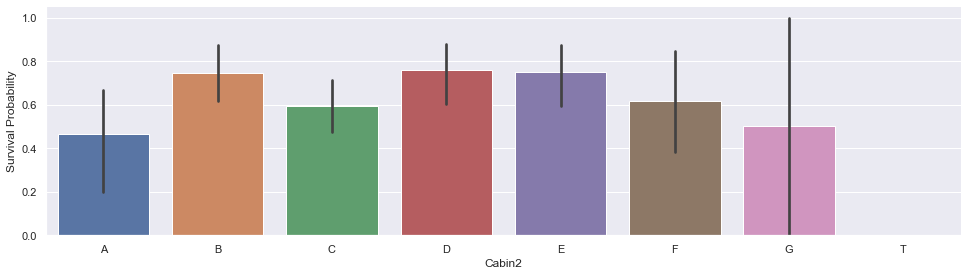

In [49]:
g = sns.factorplot(y="Survived", x="Cabin2", data=cab, kind="bar", order=['A','B','C','D','E','F','G','T'], size=4, aspect=3.4)
g = g.set_ylabels("Survival Probability")
g = g.set_ylabels("Survival Probability")

Because of the low number of passenger that have a cabin, cabin is not a reliable measure to use in the model.

There is no distinct differences in the cabins so they will not be used.

### 9.6 Ticket Column <a class="anchor" id="ticket"></a>

In [50]:
# Are there any null values?
tick = len(train_df["Ticket"])
print ("Total variables for Ticket are:", tick)
null_Embarked = train_df["Ticket"].isnull().sum()
print("Missing values for Ticket are:", null_Embarked)

Total variables for Ticket are: 891
Missing values for Ticket are: 0


In [51]:
a = min(train_df["Ticket"]), max(train_df["Ticket"])
print('Min and Max values are:', a)

b= train_df.Ticket.unique()
print('Unique values are:', b)

c = train_df.Ticket.dtype
print('Data type is:', c)

Min and Max values are: ('110152', 'WE/P 5735')
Unique values are: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' '

In [52]:
## See if common occurences by extracting the ticket prefix. When there is no prefix it returns X. 
# Replace the Cabin number by the type of cabin 'X' if not
train_df["Ticket"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Ticket'] ])

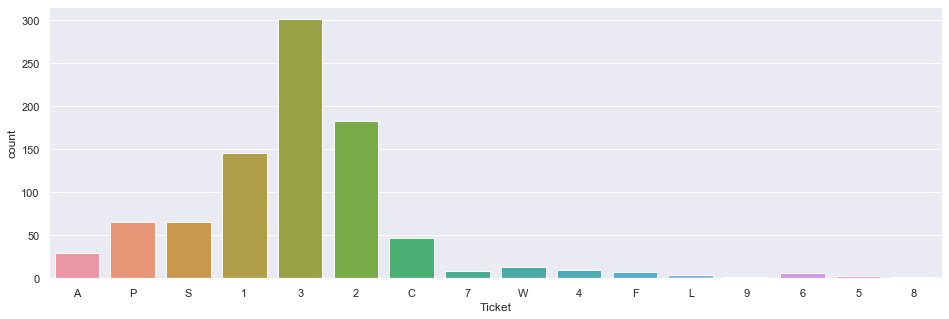

In [53]:
# Delete rows with value of X
train_df = train_df[train_df.Ticket != 'X']
# chart ticket letter
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(train_df["Ticket"])

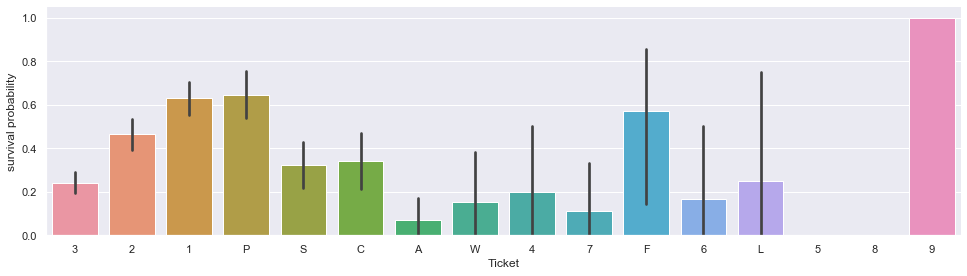

In [54]:
g = sns.factorplot(x="Ticket",y="Survived",data=train_df,kind="bar", order = train_df["Ticket"].value_counts().index, size=4, aspect=3.4)
g = g.set_ylabels("survival probability")

There are 

### 9.7 Fare Column <a class="anchor" id="fare"></a>

In [55]:
# Are there any null values?
fare = len(train_df["Fare"])
print ("Total variables for Fare are:", fare)
fare2 = train_df["Fare"].isnull().sum()
print("Missing values for Fare are:", fare2)

Total variables for Fare are: 891
Missing values for Fare are: 0


In [56]:
a = min(train_df["Fare"]), max(train_df["Fare"])
print('Min and Max values are:', a)

b= train_df.Fare.unique()
print('Unique values are:', b)

c = train_df.Fare.dtype
print('Data type is:', c)

Min and Max values are: (0.0, 512.3292)
Unique values are: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05 

### 9.8 Parch Column <a class="anchor" id="parch"></a>

In [57]:
# Are there any null values?
par = len(train_df["Parch"])
print ("Total variables for Parch are:", par)
null_Embarked = train_df["Parch"].isnull().sum()
print("Missing values for Parch are:", null_Embarked)

Total variables for Parch are: 891
Missing values for Parch are: 0


In [58]:
a = min(train_df["Parch"]), max(train_df["Parch"])
print('Min and Max values are:', a)

b= train_df.Parch.unique()
print('Unique values are:', b)

c = train_df.Parch.dtype
print('Data type is:', c)

Min and Max values are: (0, 6)
Unique values are: [0 1 2 5 3 4 6]
Data type is: int64


### 9.9 SibSp column<a class="anchor" id="sibsp"></a>

In [59]:
# Are there any null values?
sib = len(train_df["SibSp"])
print ("Total variables for SibSp are:", sib)
null_sib = train_df["SibSp"].isnull().sum()
print("Missing values for SibSp are:", null_sib)

Total variables for SibSp are: 891
Missing values for SibSp are: 0


In [60]:
a = min(train_df["SibSp"]), max(train_df["SibSp"])
print('Min and Max values are:', a)

b= train_df.SibSp.unique()
print('Unique values are:', b)

c = train_df.SibSp.dtype
print('Data type is:', c)

Min and Max values are: (0, 8)
Unique values are: [1 0 3 4 2 5 8]
Data type is: int64


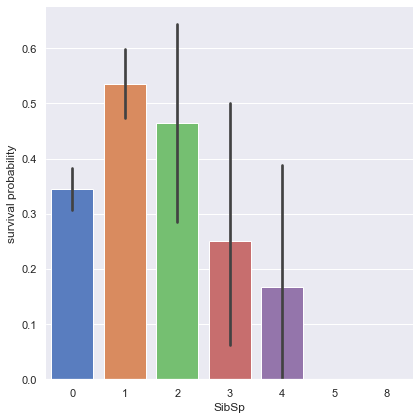

In [61]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Passengers having a lot of siblings/spouses have less chance to survive, especially those with 3 or 4 siblings/ spouses. 

In [62]:
# Create a family size descriptor from SibSp and Parch
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

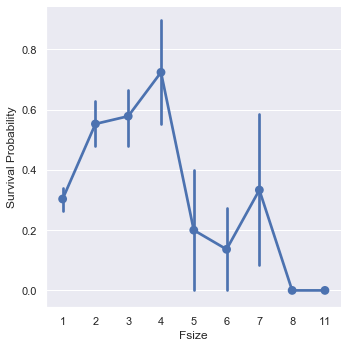

In [63]:
g = sns.factorplot(x="Fsize",y="Survived",data = train_df)
g = g.set_ylabels("Survival Probability")

The family size seems to play an important role, survival probability is worst for large families.

### 9.10 Age column <a class="anchor" id="age"></a>

In [64]:
# Are there any null values?
a = len(train_df["Age"])
print ("Total variables for Age are:", a)
null_Embarked = train_df["Age"].isnull().sum()
print("Missing values for Age are:", null_Embarked)

Total variables for Age are: 891
Missing values for Age are: 177


In [65]:
null_Age = train_df["Age"].isnull().sum()
print("Missing values for Age are:", null_Age)

Missing values for Age are: 177


There is a significant number of missing values for the Age value. It will not be used as a variable for the model. Title is a rough adequate representation.

So must find a way to fill it in with:
- median or mean
- imputation ie. predictive model to predict what value of missing value should be (can use entire dataset or just training dataset)
- find a proxy or other value that mimics value in question


Text(0.5, 1, 'Survival Rate Based on Age')

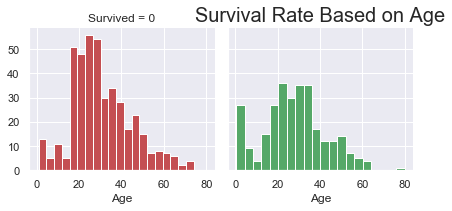

In [66]:
g = sns.FacetGrid(train_df, col='Survived', hue_kws={'color': ['r', 'g']}, hue="Survived")
g.map(plt.hist, 'Age', bins=20)
plt.title('Survival Rate Based on Age', fontsize=20)

#ax1, ax2 = g.axes[0]

#ax1.axhline(10, ls='--')
#ax2.axhline(30, ls='--')

C:\Users\sexto\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\sexto\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\sexto\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


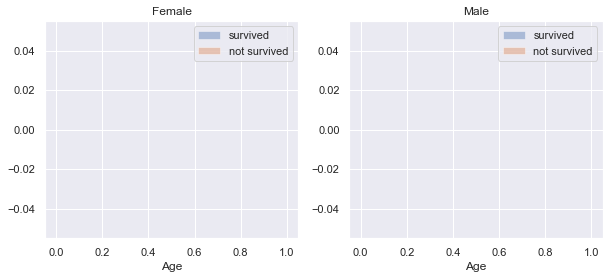

In [67]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [68]:
# create a correlation matrix AFTER get variables cleaned up

# 10. Modeling <a class="anchor" id="modeling"></a>

Prepare X_train, Y_train, X_test datasets. The X_train & X_test datasets must be of equal column length. The Y_train dataset must be the survived column and must be of equal row length to the X_train.

To prepare the data, look at train_df and drop unnecessary rows.

In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Cabin2,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,0,3,3,X,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,1,2,2,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,0,1,1,X,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,0,2,2,C,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,0,3,3,X,1


In [70]:
# In training dataset, remove rows that are :
# 1. redundant 
# 2. have shown in the Exploratory section are missing too many values & not been able to be cleaned up
# Keep: Sex, Pclass, Title2, Embarked, Parch, FSize
# Remove: Title (similar to Title2), Name (too unique), Cabin (too many values missing), Ticket (too unique),
#         Fare (too unique), SibSp (similar to Fsize), Age (too unique), PassengerId (too unique), Cabin2 (duplicate), Parch (too unique)
X_train = train_df.drop(["Title", "Name", "Cabin", "Ticket", "Fare", "SibSp", "Age", "Survived", "PassengerId", "Cabin2", "Parch"], axis=1)
Y_train = train_df["Survived"]
X_train.shape, Y_train.shape

((891, 5), (891,))

In [71]:
X_train.head(n=2)

,Pclass,Sex,Embarked,Title2,Fsize
0,3,0,0,3,2
1,1,1,1,2,2


In [113]:
# Prepare test dataset by performing necessary data manipulation on columns and adding columns
# Determine what needs to be done by examining the test_df
test_df.head(n=2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Fsize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,3.0,3.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2.0,2.0,2


In [126]:
# creating bool series True for NaN values  
bool_series = pd.isnull(test_df["Title"])  
    
# filtering data  
# displaying data only with Title2 = NaN  
test_df[bool_series]  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Fsize


In [123]:
# To prepare dataset: 
# 1. data manipulation to create Title2, Fsize 
# 2. remove PassengerId, Name, Age, Parch, Ticket, Fare, Cabin columns
# 3. convert string columns to numeric

dataset_title2 = [i.split(",")[1].split(".")[0].strip() for i in test_df["Name"]]
test_df["Title"] = pd.Series(dataset_title2)
test_df["Title"] = test_df["Title"].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
test_df["Title"] = test_df["Title"].replace(['Lady', 'the Countess','Countess', 'Dona'], 'Mrs')
test_df["Title"] = test_df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3, "Rare":4})
test_df["Title"] = test_df["Title"].astype(int)

# Create a family size descriptor from SibSp and Parch
#test_df["Fsize"] = test_df["SibSp"] + test_df["Parch"] + 1

# Change string columns to numeric
#test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


#X_test  = test_df.drop(["PassengerId", "Name", "Age", "Parch", "Ticket", "Fare", "Cabin", "SibSp", "Title"], axis=1).copy()
#X_test.shape


In [122]:
# prints specific line in dataframe (414 in this case)
# print(test_df.loc[[414]])

     PassengerId  Pclass                          Name  Sex   Age  SibSp  \
414         1306       1  Oliva y Ocana, Dona. Fermina    1  39.0      0   

     Parch    Ticket   Fare Cabin  Embarked Title  Title2  Fsize  
414      0  PC 17758  108.9  C105         1   Mrs     NaN      1  


In [118]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Fsize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Mr,3.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Mrs,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Mr,3.0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Mr,3.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Mrs,2.0,3


In [87]:
all = len(test_df["Title2"])
print ("Total variables for Sex are:", all)
null_Survived = test_df["Title2"].isnull().sum()
print("Missing values for Survived are:", null_Survived)
null_Sex = test_df["Title"].isnull().sum()
print("Missing values for Sex are:", null_Sex)

Total variables for Sex are: 418
Missing values for Survived are: 6
Missing values for Sex are: 0


In [90]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Fsize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Mr,3.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Mrs,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Mr,3.0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Mr,3.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Mrs,2.0,3


The decision trees implemented in scitkit-learn uses only numerical features and these features are interpretered always as continous numeric variables. Code the categeroical feature into multiple binary features with 1 when the category matches and 0 otherwise. This is called one-hot-encoding.

In [127]:
X_test.head(n=2)

,Pclass,Sex,Embarked,Title2,Fsize
0,3,0,2,3.0,1
1,3,1,0,2.0,2


The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [110]:
X_test.describe()

,Pclass,Sex,Embarked,Title2,Fsize
count,418.000000,418.000000,418.000000,412.000000,418.000000
mean,2.265550,0.363636,0.464115,2.288835,1.839713
std,0.841838,0.481622,0.685516,0.947052,1.519072
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,2.000000,1.000000
50%,3.000000,0.000000,0.000000,3.000000,1.000000
75%,3.000000,1.000000,1.000000,3.000000,2.000000
max,3.000000,1.000000,2.000000,3.000000,11.000000


In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null int32
Embarked    891 non-null int32
Title2      891 non-null int32
Fsize       891 non-null int64
dtypes: int32(3), int64(2)
memory usage: 71.3 KB


In [128]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Embarked    418 non-null int32
Title2      412 non-null float64
Fsize       418 non-null int64
dtypes: float64(1), int32(2), int64(2)
memory usage: 13.2 KB


In [125]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').